<a href="https://colab.research.google.com/github/F1-bot/multi-label-text-classification-for-professional-orientation/blob/main/F1_bot_multi_label_text_classification_for_professional_orientation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# F1-bot / multi-label-text-classification-for-professional-orientation

In [ ]:
import keras as k
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
# імпорт необхідних для роботи бібліотек

In [ ]:
data_frame = pd.read_csv('https://raw.githubusercontent.com/F1-bot/multi-label-text-classification-for-professional-orientation/main/P_BASE_v130813.csv')
# завантаження data set проекту

In [ ]:
data_frame.head()
# попередній перегляд успішності завантаження data set проекту

,Age,ET,IT1,ST,NT,TT1,FT,JT,PT,AT,TT2,RPT,IPT,APT,SPT,PPT,CPT,PWP1,PRE,PWP2,PET1,PET2,PPET,IQ,RSA,RSB,RSC,RSD,RSE,ABF,BCM,CVW,CAD,EU,EM,EA,H,HEM,IT2,LR,LES,LST,MAPR,MI,PC,PSA,PHR,RS,SP,SC,TE,TL
0,39,11,89,59,41,89,11,78,22,34,66,9,11,3,4,6,10,0,10,4,1,1,8,130,100,100,92,100,100,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,33,63,37,45,55,39,61,43,57,41,59,10,4,8,9,7,5,12,4,1,2,2,3,102,100,92,75,75,33,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,39,54,46,67,33,54,46,63,37,63,37,11,7,4,7,3,11,8,5,1,1,0,9,110,100,100,92,58,58,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,37,41,59,32,68,61,39,81,19,39,61,8,10,2,4,7,12,4,5,1,1,1,12,126,100,100,100,92,83,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,34,28,72,68,32,81,19,71,29,76,24,11,11,4,5,1,11,1,6,8,2,0,7,108,92,83,83,75,67,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
input_names = ["Age", "ET", "IT1", "ST", "NT", "TT1", "FT", "JT", "PT", "AT", "TT2", "RPT", "IPT", "APT", "SPT", "PPT", "CPT",
               "PWP1", "PRE", "PWP2", "PET1", "PET2", "PPET", "IQ", "RSA", "RSB", "RSC", "RSD", "RSE"]
output_names = ["ABF", "BCM", "CVW", "CAD", "EU", "EM", "EA", "H", "HEM", "IT2", "LR", "LES", "LST", "MAPR", "MI", "PC",
                "PSA", "PHR", "RS", "SP", "SC", "TE", "TL"]
                
                # підготовка найменунь, де input_names визнає вхідні дані (про особу), а output, відповідно, вихідні (про напрями професійної діяльності)

In [ ]:
raw_input_data = data_frame[input_names]
raw_output_data = data_frame[output_names]
# початковий фрейм з необробленими вхідними та вихідними даними

In [ ]:
max_age = 46
max_iq = 140
max_pt = 14
max_q = 100
max_p = 12
max_r = 100
encoders = {"Age": lambda age: [age/max_age],
            "ET": lambda et: [et/max_q],
            "IT1": lambda it1: [it1/max_q],
            "ST": lambda st: [st/max_q],
            "NT": lambda nt: [nt/max_q],
            "TT1": lambda tt1: [tt1/max_q],
            "FT": lambda ft: [ft/max_q],
            "JT": lambda jp: [jp/max_q],
            "PT": lambda pt: [pt/max_q],
            "AT": lambda at: [at/max_q],
            "TT2": lambda tt2: [tt2/ max_q],
            "RPT": lambda rpt: [rpt/max_pt],
            "IPT": lambda ipt: [ipt/max_pt],
            "APT": lambda apt: [apt/max_pt],
            "SPT": lambda spt: [spt/max_pt],
            "PPT": lambda ppt: [ppt/max_pt],
            "CPT": lambda cpt: [cpt/max_pt],
            "PWP1": lambda pwp1: [pwp1/max_p],
            "PRE": lambda pre: [pre/max_p],
            "PWP2": lambda pwp2: [pwp2/max_p],
            "PET1": lambda pet1: [pet1/max_p],
            "PET2": lambda pet2: [pet2/max_p],
            "PPET": lambda ppet: [ppet/max_p],
            "IQ": lambda iq: [iq/max_iq],
            "RSA": lambda rsa: [rsa/max_r],
            "RSB": lambda rsb: [rsb/max_r],
            "RSC": lambda rsc: [rsc/max_r],
            "RSD": lambda rsd: [rsd/max_r],
            "RSE": lambda rse: [rse/max_r],

            "ABF": lambda abf_value: [abf_value],
            "BCM": lambda bcm_value: [bcm_value],
            "CVW": lambda cvw_value: [cvw_value],
            "CAD": lambda cad_value: [cad_value],
            "EU": lambda eu_value: [eu_value],
            "EM": lambda em_value: [em_value],
            "EA": lambda ea_value: [ea_value],
            "H": lambda h_value: [h_value],
            "HEM": lambda hem_value: [hem_value],
            "IT2": lambda it2_value: [it2_value],
            "LR": lambda lr_value: [lr_value],
            "LES": lambda les_value: [les_value],
            "LST": lambda lst_value: [lst_value],
            "MAPR": lambda mapr_value: [mapr_value],
            "MI": lambda mi_value: [mi_value],
            "PC": lambda pc_value: [pc_value],
            "PSA": lambda psa_value: [psa_value],
            "PHR": lambda phr_value: [phr_value],
            "RS": lambda rs_value: [rs_value],
            "SP": lambda sp_value: [sp_value],
            "SC": lambda sc_value: [sc_value],
            "TE": lambda te_value: [te_value],
            "TL": lambda tl_value: [tl_value]}

            # словник вхідних та вихідних даних (з нормалізацією)

In [ ]:
def dataframe_to_dict(df):
    result = dict()
    for column in df.columns:
        values = data_frame[column].values
        result[column] = values
    return result
    
    # датафрейм для csv

In [ ]:
def make_supervised(df):
    raw_input_data = data_frame[input_names]
    raw_output_data = data_frame[output_names]
    return {"inputs": dataframe_to_dict(raw_input_data),
            "outputs": dataframe_to_dict(raw_output_data)}

    # розподіл вхідних та вихідних даних

In [ ]:
def encode(data):
    vectors = []
    for data_name, data_values in data.items():
        encoded = list(map(encoders[data_name], data_values))
        vectors.append(encoded)
    formatted = []
    for vector_raw in list(zip(*vectors)):
        vector = []
        for element in vector_raw:
            for e in element:
                vector.append(e)
        formatted.append(vector)
    return formatted

    # функція для кодування у вектори

In [ ]:
supervised = make_supervised(data_frame)
encoded_inputs = np.array(encode(supervised["inputs"]))
encoded_outputs = np.array(encode(supervised["outputs"]))

# прийом датафрейму з вхідними та вихідними даними

In [ ]:
train_x = encoded_inputs[:600]
train_y = encoded_outputs[:600]

test_x = encoded_inputs[600:] 
test_y = encoded_outputs[600:] 

# розподіл вибірки

In [ ]:
INPUT_DIM = 29
OUTPUT_DIM = 23

# кількість вхідних та вихідних елементів

In [ ]:
model = k.models.Sequential()
model.add(k.layers.Dense(8, activation='relu',  input_dim = INPUT_DIM ))
model.add(k.layers.Dense(8, activation='relu'))
model.add(k.layers.Dense(OUTPUT_DIM, activation='softmax'))
# опис моделі для класифікації та прогназування

In [ ]:
model.compile(loss="mse", optimizer="sgd", metrics=["accuracy"])

# компіляція моделі

In [ ]:
fit_results = model.fit(train_x, train_y, epochs=200, validation_split=0.1)

# тренування моделі за розподіленою вибіркою

Epoch 1/200
17/17 [==============================] - 1s 12ms/step - loss: 0.0417 - accuracy: 0.0370 - val_loss: 0.0417 - val_accuracy: 0.0667
Epoch 2/200
17/17 [==============================] - 0s 3ms/step - loss: 0.0417 - accuracy: 0.0370 - val_loss: 0.0417 - val_accuracy: 0.0667
Epoch 3/200
17/17 [==============================] - 0s 4ms/step - loss: 0.0417 - accuracy: 0.0370 - val_loss: 0.0417 - val_accuracy: 0.0667
Epoch 4/200
17/17 [==============================] - 0s 3ms/step - loss: 0.0417 - accuracy: 0.0370 - val_loss: 0.0417 - val_accuracy: 0.0667
Epoch 5/200
17/17 [==============================] - 0s 3ms/step - loss: 0.0417 - accuracy: 0.0370 - val_loss: 0.0417 - val_accuracy: 0.0667
Epoch 6/200
17/17 [==============================] - 0s 3ms/step - loss: 0.0417 - accuracy: 0.0370 - val_loss: 0.0417 - val_accuracy: 0.0667
Epoch 7/200
17/17 [==============================] - 0s 3ms/step - loss: 0.0417 - accuracy: 0.0370 - val_loss: 0.0417 - val_accuracy: 0.0667
Epoch 8/200


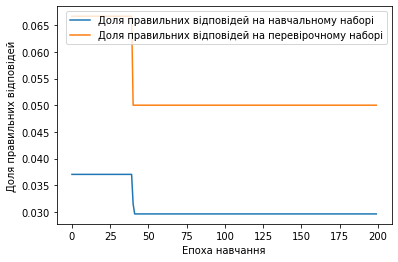

In [ ]:
plt.plot(fit_results.history['accuracy'], 
         label='Доля правильних відповідей на навчальному наборі')
plt.plot(fit_results.history['val_accuracy'], 
         label='Доля правильних відповідей на перевірочному наборі')
plt.xlabel('Епоха навчання')
plt.ylabel('Доля правильних відповідей')
plt.legend()
plt.show()

# Візуалізація правильних відповідей при навчанні та перевірці

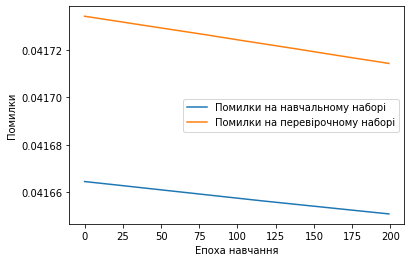

In [ ]:
plt.plot(fit_results.history['loss'], 
         label='Помилки на навчальному наборі')
plt.plot(fit_results.history['val_loss'], 
         label='Помилки на перевірочному наборі')
plt.xlabel('Епоха навчання')
plt.ylabel('Помилки')
plt.legend()
plt.show()

# Візуалізація помилок при навчанні та перевірці

In [ ]:
predicted_test = model.predict(test_x)
print(predicted_test[0])

# загальні тенденції за всіма елементами виводу

[0.05824558 0.04547187 0.03717671 0.03978026 0.04673031 0.03552687
 0.03658408 0.04375518 0.05331522 0.04820884 0.04514691 0.03333116
 0.05539456 0.03393472 0.04543976 0.03286758 0.03959785 0.04327717
 0.0363008  0.05195621 0.05143728 0.03753009 0.04899105]


In [ ]:
real_data = data_frame.iloc[600:][output_names+input_names]
real_data.reset_index(inplace=True)
real_data["ABF"] = predicted_test[:,0]
real_data["BCM"] = predicted_test[:,1]
real_data["CVW"] = predicted_test[:,2]
real_data["CAD"] = predicted_test[:,3]
real_data["EU"] = predicted_test[:,4]
real_data["EM"] = predicted_test[:,5]
real_data["EA"] = predicted_test[:,6]
real_data["H"] = predicted_test[:,7]
real_data["HEM"] = predicted_test[:,8]
real_data["IT2"] = predicted_test[:,9]
real_data["LR"] = predicted_test[:,10]
real_data["LES"] = predicted_test[:,11]
real_data["LST"] = predicted_test[:,12]
real_data["MAPR"] = predicted_test[:,13]
real_data["MI"] = predicted_test[:,14]
real_data["PC"] = predicted_test[:,15]
real_data["PSA"] = predicted_test[:,16]
real_data["PHR"] = predicted_test[:,17]
real_data["RS"] = predicted_test[:,18]
real_data["SP"] = predicted_test[:,19]
real_data["SC"] = predicted_test[:,20]
real_data["TE"] = predicted_test[:,21]
real_data["TL"] = predicted_test[:,22]
print(real_data)

# виведення інформації відповідності, відповідно до вихідних елементів

     index       ABF       BCM       CVW       CAD  ...  RSA  RSB  RSC  RSD  RSE
0      600  0.058246  0.045472  0.037177  0.039780  ...  100   83   92   58   42
1      601  0.049931  0.043789  0.040956  0.040978  ...  100   83   67   83   42
2      602  0.046555  0.043600  0.042571  0.042560  ...   75   50   50   67   58
3      603  0.051768  0.043585  0.040445  0.040196  ...   75   58   67   92   50
4      604  0.054102  0.045066  0.038828  0.040941  ...   92   83   75   50   17
..     ...       ...       ...       ...       ...  ...  ...  ...  ...  ...  ...
361    961  0.053922  0.049591  0.037776  0.036189  ...   92   92   92   83   92
362    962  0.049886  0.043587  0.041504  0.041505  ...  100  100  100   92   67
363    963  0.053922  0.049591  0.037776  0.036189  ...   92   92   92   83   92
364    964  0.049886  0.043587  0.041504  0.041505  ...  100  100  100   92   67
365    965  0.053922  0.049591  0.037776  0.036189  ...   92   92   92   83   92

[366 rows x 53 columns]


In [ ]:
pd.DataFrame(real_data)

# табличний вигляд опрацьованих вихідних даних

,index,ABF,BCM,CVW,CAD,EU,EM,EA,H,HEM,IT2,LR,LES,LST,MAPR,MI,PC,PSA,PHR,RS,SP,SC,TE,TL,Age,ET,IT1,ST,NT,TT1,FT,JT,PT,AT,TT2,RPT,IPT,APT,SPT,PPT,CPT,PWP1,PRE,PWP2,PET1,PET2,PPET,IQ,RSA,RSB,RSC,RSD,RSE
0,600,0.058246,0.045472,0.037177,0.039780,0.046730,0.035527,0.036584,0.043755,0.053315,0.048209,0.045147,0.033331,0.055395,0.033935,0.045440,0.032868,0.039598,0.043277,0.036301,0.051956,0.051437,0.037530,0.048991,26,74,26,19,81,61,39,73,27,63,37,8,8,4,10,8,5,10,4,2,2,1,5,102,100,83,92,58,42
1,601,0.049931,0.043789,0.040956,0.040978,0.048818,0.039277,0.041621,0.042163,0.048697,0.046038,0.044026,0.037059,0.049212,0.037333,0.047446,0.038406,0.042809,0.043178,0.037899,0.046274,0.046154,0.042961,0.044977,33,73,27,72,28,28,72,69,31,69,31,8,3,8,6,10,8,10,2,1,8,1,2,102,100,83,67,83,42
2,602,0.046555,0.043600,0.042571,0.042560,0.047010,0.040407,0.042286,0.042680,0.047326,0.044063,0.043880,0.040025,0.045902,0.040196,0.046760,0.040006,0.043937,0.044310,0.040209,0.045608,0.044159,0.042446,0.043505,41,81,19,63,37,37,63,70,30,54,46,7,3,3,6,12,12,11,1,3,2,2,5,90,75,50,50,67,58
3,603,0.051768,0.043585,0.040445,0.040196,0.051781,0.037473,0.041139,0.041283,0.051145,0.046301,0.044054,0.034986,0.050718,0.035316,0.050025,0.036562,0.043195,0.043471,0.035735,0.047164,0.046216,0.042775,0.044667,44,69,31,43,57,30,70,83,17,60,40,8,2,2,6,13,12,10,7,1,2,2,2,96,75,58,67,92,50
4,604,0.054102,0.045066,0.038828,0.040941,0.045650,0.037666,0.038333,0.043961,0.050662,0.046991,0.044902,0.035942,0.051961,0.036463,0.044741,0.035430,0.040590,0.043503,0.038292,0.049870,0.049454,0.038948,0.047705,34,83,17,39,61,42,58,41,59,57,43,7,8,4,12,7,5,10,3,1,3,1,5,92,92,83,75,50,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,961,0.053922,0.049591,0.037776,0.036189,0.053509,0.031798,0.034760,0.040631,0.048781,0.052124,0.040832,0.032959,0.063746,0.031131,0.054705,0.037143,0.042986,0.041101,0.038963,0.047203,0.046847,0.038802,0.044500,38,58,42,41,59,67,33,65,35,92,8,6,7,5,11,9,4,5,8,4,1,0,6,120,92,92,92,83,92
362,962,0.049886,0.043587,0.041504,0.041505,0.050867,0.037268,0.040906,0.041739,0.051628,0.044489,0.044168,0.036608,0.048434,0.036928,0.050348,0.036518,0.044305,0.045109,0.036942,0.047817,0.044736,0.041259,0.043447,28,51,49,67,33,35,65,29,71,32,68,8,4,8,7,8,7,10,3,2,3,3,3,122,100,100,100,92,67
363,963,0.053922,0.049591,0.037776,0.036189,0.053509,0.031798,0.034760,0.040631,0.048781,0.052124,0.040832,0.032959,0.063746,0.031131,0.054705,0.037143,0.042986,0.041101,0.038963,0.047203,0.046847,0.038802,0.044500,38,58,42,41,59,67,33,65,35,92,8,6,7,5,11,9,4,5,8,4,1,0,6,120,92,92,92,83,92
364,964,0.049886,0.043587,0.041504,0.041505,0.050867,0.037268,0.040906,0.041739,0.051628,0.044489,0.044168,0.036608,0.048434,0.036928,0.050348,0.036518,0.044305,0.045109,0.036942,0.047817,0.044736,0.041259,0.043447,28,51,49,67,33,35,65,29,71,32,68,8,4,8,7,8,7,10,3,2,3,3,3,122,100,100,100,92,67


In [ ]:
model.save("gg_model.h5")
real_data.to_csv("PROF_OUTPUT.csv")
# збереження моделі

In [ ]:
files.download("gg_model.h5")
files.download("PROF_OUTPUT.csv")
# завантаження моделі та .csv файлу з прогнозуванням успіху  при обрані професійного напряму

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>